<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#PCA-with-Eigenvalue-Decomposition-(15-P)" data-toc-modified-id="PCA-with-Eigenvalue-Decomposition-(15-P)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA with Eigenvalue Decomposition (15 P)</a></span></li><li><span><a href="#Iterative-PCA-(15-P)" data-toc-modified-id="Iterative-PCA-(15-P)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Iterative PCA (15 P)</a></span></li></ul></li></ul></div>

In [1]:
import numpy,sklearn,sklearn.datasets,utils
%matplotlib inline

In [4]:
len(numpy.random.mtrand.RandomState(4).permutation(100))

100

# Principal Component Analysis

In this exercise, we will experiment with two different techniques to compute the PCA components of a dataset:

* **Standard PCA**: The standard technique based on eigenvalue decomposition.

* **Iterative PCA**: A technique that iteratively optimizes the PCA objective.

We consider a random subset of the Labeled Faces in the Wild (LFW) dataset, readily accessible from sklearn, and we apply some basic preprocessing to discount strong variations of luminosity and contrast.

In [18]:
X = sklearn.datasets.fetch_lfw_people(resize=0.5)['images']
X = X[numpy.random.mtrand.RandomState(1).permutation(len(X))[:150]]*1.0
X = X - X.mean(axis=(1,2),keepdims=True)
X = X / X.std(axis=(1,2),keepdims=True)
print(X.shape)

(150, 62, 47)


In [16]:
print(X[1,1,1])
print(X[1,1])
print(X[1])

-0.48249218
[-0.88294584 -0.48249218  0.12319398  0.62876654  0.8289935   0.65379494
  0.53365886  0.7188686   0.65379494  0.1582336  -0.4074071  -0.14711232
  0.59372693  0.8640331   0.8990727   0.8890615   0.8640331   0.97415775
  1.0442373   0.9691522   0.8990727   0.93411255  0.9641466   1.0292202
  1.1243279   1.2244414   1.1743847   1.0292202   0.90908414  0.82398766
  0.65880054  0.5136363   0.40851718  0.37848318  0.26335266  0.10817697
 -0.01195912 -0.15211792 -0.29227674 -0.41741854 -0.5075206  -0.5725942
 -0.67771333 -0.83789486 -0.9830592  -1.1282238  -1.1632633 ]
[[-0.9079742  -0.5075206   0.10817697 ... -1.0281103  -1.1782804
  -1.2633768 ]
 [-0.88294584 -0.48249218  0.12319398 ... -0.9830592  -1.1282238
  -1.1632633 ]
 [-0.9079742  -0.5125262   0.10317115 ... -1.0080875  -1.0731612
  -1.1082009 ]
 ...
 [-1.9942045  -1.9141139  -1.8039892  ... -1.5887454  -1.0130932
  -0.27225402]
 [-1.9942045  -1.9291309  -1.8240118  ... -1.1432408  -0.3573505
  -0.29227674]
 [-1.9942045

Two functions are provided for your convenience and are available in `utils.py` that is included in the zip archive. The functions are the following:

* **`utils.scatterplot`** produces a scatter plot from a two-dimensional data set.

* **`utils.render`** takes an array of data points or objects of similar shape, and renders them in the IPython notebook.

Some demo code that makes use of these functions is given below.

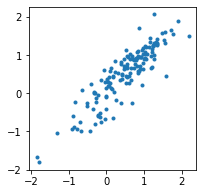

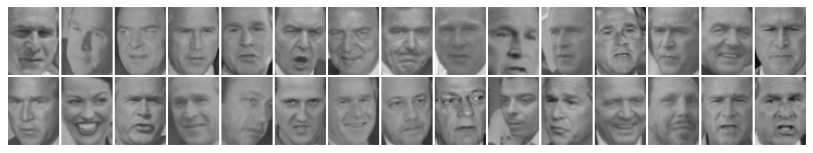

In [7]:
utils.scatterplot(X[:,32,30],X[:,32,31]) # Plot relation between adjacent pixels
utils.render(X[:30],15,2,vmax=5)         # Display first 10 examples in the data


## PCA with Eigenvalue Decomposition (15 P)

Principal components can be found by solving the eigenvalue problem

$$
S \boldsymbol{w} = \lambda \boldsymbol{w}.
$$

where  $S = \sum_{k=1}^N (\boldsymbol{x}_k - \boldsymbol{m}) (\boldsymbol{x}_k - \boldsymbol{m})^\top$ is the scatter matrix, and where $\boldsymbol{m} = \frac1N \sum_{k=1}^N \boldsymbol{x}_k$ is the mean vector.

**Tasks:**

* **Compute the principal components of the data using the function `numpy.linalg.eigh`.**
* **Measure the computational time required to find the principal components. Use the function `time.time()` for that purpose. Do *not* include in your estimate the computation overhead caused by loading the data, plotting and rendering.**
* **Plot the projection of the dataset on the first two principal components using the function `utils.scatterplot`.**
* **Visualize the 60 leading principal components using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

In [23]:
?numpy.reshape

In [26]:
print(len(X))
print(X.shape)
X = X.reshape(len(X),-1)
print(X.shape)

150
(150, 62, 47)
(150, 2914)


In [27]:
import numpy.linalg
import time

tini = time.time()

X = X.reshape(len(X),-1)
X -= X.mean(axis = 0)
S = numpy.dot(X.T,X)

W,U = numpy.linalg.eigh(S)
print(W.shape)
print(U.shape)
tfin = time.time()

print('Time: %.3f seconds' % (tfin-tini))




(2914,)
(2914, 2914)
Time: 3.646 seconds


In [26]:
print(S.shape)
#Question to the programm in sheet 3
#by Xinjian Pan - Montag, 23 November 2020, 10:40

#After I look the programm-solution of sheet 3, I have a question to it. In this Task, we have 150 pictures and 2914 Attributes for each pictures. But I noticed that, 
#in the solution you compute the shape of eigenVector is 2914 X 2914 and the shape of S is also 2914 X 2914, but actually we have only 150 pictures. And in my opinion,
#the shape of S should be 150 X 150, and then we can get the the shape of eigenVector is 150X2914. That will be faster, and the result is also good(in my opinion). 


(2914, 2914)


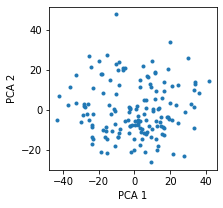

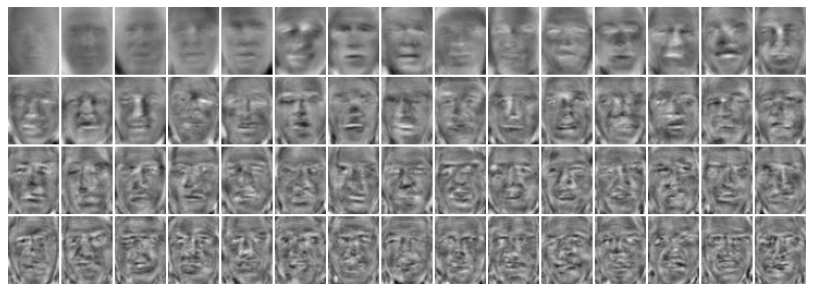

In [28]:
utils.scatterplot(X.dot(U[:,-1]),X.dot(U[:,-2]),xlabel='PCA 1',ylabel='PCA 2')

utils.render(U[:,-60:][:,::-1].T,15,4) 


When looking at the scatter plot, we observe that much more variance is expressed in the first two principal components than in individual dimensions as it was plotted before. When looking at the principal components themselves which we render as images, we can see that the first principal components correspond to low-frequency filters that select for coarse features, and the following principal components capture progressively higher-frequency information and are also becoming more noisy.

## Iterative PCA (15 P)

The standard PCA method based on eigenvalues is quite expensive to compute. Instead, the power iteration algorithm looks only for the first component and finds it using an iterative procedure. It starts with an initial weight vector $\boldsymbol{w}$, and repeatedly applies the update rule

$$
\boldsymbol{w} \leftarrow S \boldsymbol{w} \,\big/\, \|S \boldsymbol{w}\|.
$$

Like for standard PCA, the objective that iterative PCA optimizes is $J(\boldsymbol{w}) = \boldsymbol{w}^\top S \boldsymbol{w}$ subject to the unit norm constraint for $\boldsymbol{w}$. We can therefore keep track of the progress of the algorithm after each iteration.

**Tasks:**

* **Implement the iterative PCA algorithm. Use as a stopping criterion the value of $J(\boldsymbol{w})$ between two iterations increasing by less than one.**
* **Print the value of the objective function $J(\boldsymbol{w})$ at each iteration.**
* **Measure the time taken to find the principal component.**
* **Visualize the the eigenvector $\boldsymbol{w}$ obtained after convergence using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, there may be some error in your implementation.

In [29]:
tini = time.time()

X = X.reshape(len(X),-1)
X -= X.mean(axis = 0)

w = numpy.random.mtrand.RandomState(346537).normal(0,1,[X.shape[1]])
w = w/(w**2).sum()**.5

S = numpy.dot(X.T,X)

Jold = -float('Inf')

for it in range(40):
    Sw = numpy.dot(S,w)
    w = Sw/(Sw**2).sum()**.5
    J = numpy.dot(w,Sw)
    
    if J - Jold<1:
        break
    
    Jold = J
    
    
    print('iteration %2d J(w)=%10.3f'%(it,J))
    

tfin = time.time()

print('Time: %.3f seconds' % (tfin-tini))

iteration  0 J(w)=   801.561
iteration  1 J(w)= 14106.344
iteration  2 J(w)= 23562.374
iteration  3 J(w)= 28533.423
iteration  4 J(w)= 33471.405
iteration  5 J(w)= 39782.462
iteration  6 J(w)= 44781.391
iteration  7 J(w)= 47210.601
iteration  8 J(w)= 48101.755
iteration  9 J(w)= 48393.525
iteration 10 J(w)= 48485.524
iteration 11 J(w)= 48514.212
iteration 12 J(w)= 48523.133
iteration 13 J(w)= 48525.906
Time: 0.337 seconds


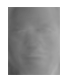

In [30]:
utils.render(w,1,1)

We observe that the computation time has decreased significantly. The difference of performance becomes larger as the number of dimensions increases. We can observe that the principal component is the same (sometimes up to a sign flip) as the one obtained by standard PCA.